# Неделя 4. Среда
## Временные ряды

В этом задании тебе предстоит проанализировать продажи разных категорий товаров. Сначала это стоит сделать для одной категории, потом можно попробовать для других. 

1. Загрузи [датасет](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls) и распечатай первые 10 строк. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import optuna

In [7]:
plt.style.use('seaborn-v0_8')

In [8]:
df = pd.read_excel('aux/Sample - Superstore.xls')

Сделай выбоорку по категории товара (используй популярную категорию: например, `Furniture`) и запиши в переменную `data`. Распечатай первые 10 строк. 

In [9]:
data = df[df['Category'] == 'Furniture']

In [10]:
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
29,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


2. Визуализируй данные:
    * по исходному целевому столбцу (`Sales`)
    * усреднить просуммировать по разным периодам (неделя, месяц, квартал, полугодие)

In [11]:
data.set_index('Order Date', inplace=True)

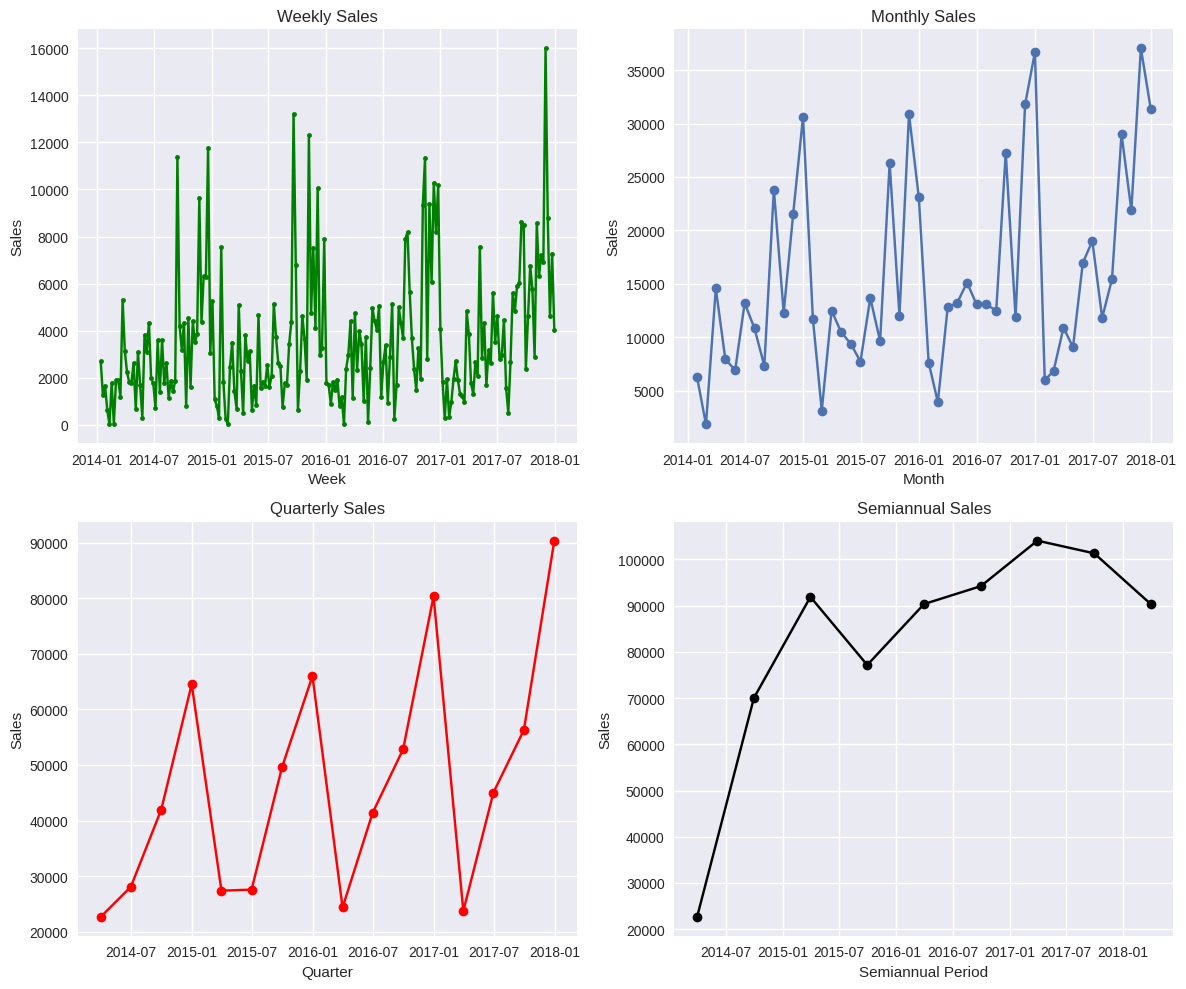

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(data['Sales'].resample('W').sum(), marker='.', c = 'g')
axes[0, 0].set_title('Weekly Sales')
axes[0, 0].set_xlabel('Week')
axes[0, 0].set_ylabel('Sales')

axes[0, 1].plot(data['Sales'].resample('M').sum(), marker='o')
axes[0, 1].set_title('Monthly Sales')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Sales')

axes[1, 0].plot(data['Sales'].resample('Q').sum(), marker='o', c = 'r')
axes[1, 0].set_title('Quarterly Sales')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Sales')

axes[1, 1].plot(data['Sales'].resample('2Q').sum(), marker='o', c = 'black')
axes[1, 1].set_title('Semiannual Sales')
axes[1, 1].set_xlabel('Semiannual Period')
axes[1, 1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

2.1 В качестве анализа необходимо взять временной ряд по __неделям__, и анализировать __сумму__. 

In [13]:
weekly_sales = pd.DataFrame(data['Sales'].resample('W').sum())
weekly_sales.head(5)

,Sales
Order Date,
2014-01-12,2712.428
2014-01-19,1250.473
2014-01-26,1655.958
2014-02-02,623.666
2014-02-09,14.560


3. Построй визуализации:
* скользящего среднего


In [14]:
n_window = 1

moving_average_pred = weekly_sales['Sales'].rolling(window=n_window, closed='left').mean()

moving_average_mae = np.round(mean_absolute_error(weekly_sales['Sales'][n_window:], moving_average_pred[n_window:]), 2)
moving_average_r2 = np.round(r2_score(weekly_sales['Sales'][n_window:], moving_average_pred[n_window:]), 2)

'MAE = 2310.23'

'r2 = -0.25'

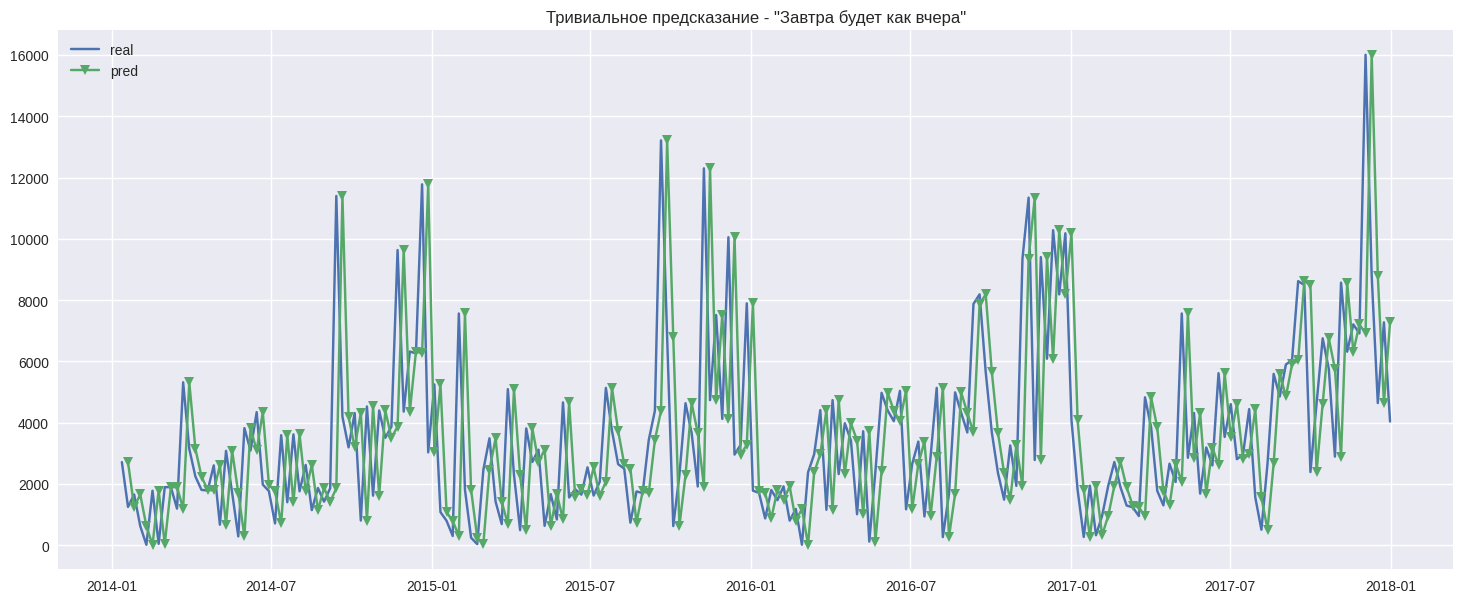

In [15]:
display(f'MAE = {moving_average_mae}')
display(f'r2 = {moving_average_r2}')
plt.figure(figsize=(18, 7))
plt.plot(weekly_sales['Sales'], label='real')
plt.plot(moving_average_pred, label='pred', marker='v')
plt.legend()
plt.title('Тривиальное предсказание - "Завтра будет как вчера"');

In [16]:
n_windows = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n_window in n_windows:
    rolling_pred = pd.DataFrame(data={'act': weekly_sales['Sales'], 'pred': weekly_sales['Sales'].rolling(window=n_window, closed='left').mean()})
    mae = np.round(mean_absolute_error(rolling_pred['act'][n_window:], rolling_pred['pred'][n_window:]), 2)
    print(f'Для скользящего окна размером {n_window}, MAE = {mae}')

Для скользящего окна размером 1, MAE = 2310.23
Для скользящего окна размером 2, MAE = 1984.15
Для скользящего окна размером 3, MAE = 1997.97
Для скользящего окна размером 4, MAE = 1949.5
Для скользящего окна размером 5, MAE = 1981.5
Для скользящего окна размером 6, MAE = 2002.46
Для скользящего окна размером 7, MAE = 1995.75
Для скользящего окна размером 8, MAE = 2002.56
Для скользящего окна размером 9, MAE = 2023.72
Для скользящего окна размером 10, MAE = 2043.6
Для скользящего окна размером 11, MAE = 2031.71
Для скользящего окна размером 12, MAE = 2041.91
Для скользящего окна размером 13, MAE = 2055.43
Для скользящего окна размером 14, MAE = 2073.7
Для скользящего окна размером 15, MAE = 2101.98


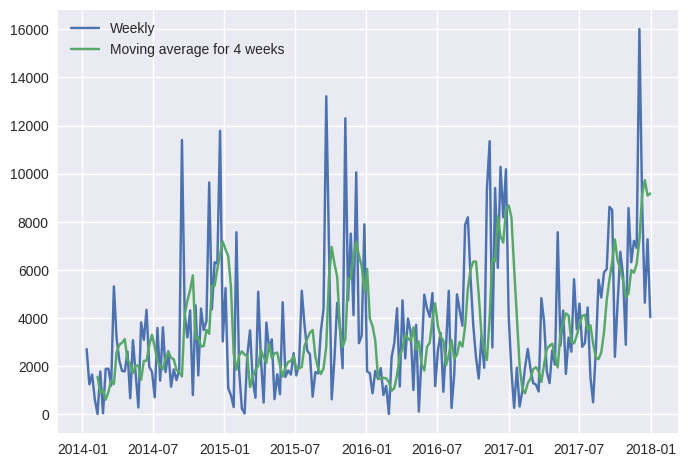

In [17]:
n_weeks = 4

plt.plot(weekly_sales['Sales'], label='Weekly')
plt.plot(weekly_sales['Sales'].rolling(window=n_weeks, closed='left').mean(), 
         label=f'Moving average for {n_weeks} weeks')
plt.legend();


* взвешенного скользящего среднего


In [18]:
def weighted_moving_average(x, n, weights):
    weights = np.array(weights)
    wmas = x.rolling(n).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True).to_list()
    result = pd.Series(wmas, index=weekly_sales.index).shift(1)
    return result

In [19]:
n_window = 2

weights = [0.4, 0.6]


weighted_moving_average_pred = weighted_moving_average(weekly_sales['Sales'], n=n_window, weights=weights)

weighted_moving_average_mae = np.round(
    mean_absolute_error(
        weekly_sales['Sales'][n_window:],
        weighted_moving_average_pred[n_window:]
    ),
    2
)
weighted_moving_average_r2 = np.round(
    r2_score(
        weekly_sales['Sales'][n_window:],
        weighted_moving_average_pred[n_window:],
    ),
    2
)

display(f'MAE = {weighted_moving_average_mae}')
display(f'r2 = {weighted_moving_average_r2}')

'MAE = 1987.92'

'r2 = 0.01'

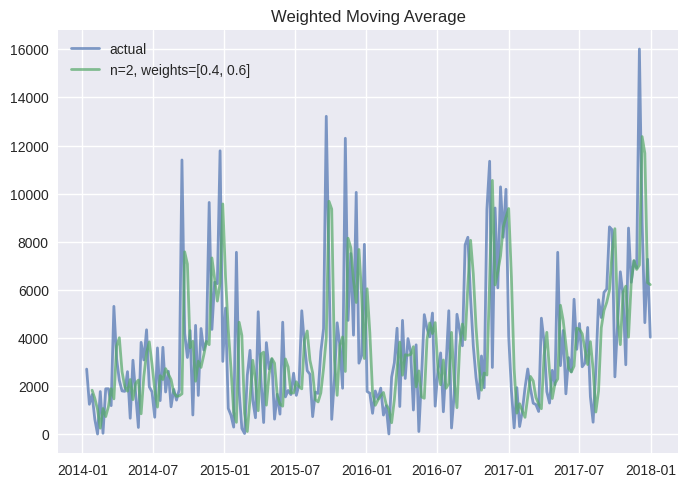

In [20]:
plt.plot(
    weekly_sales['Sales'],
    linewidth=2, 
    label='actual', 
    alpha=.7
)

plt.plot(
    weighted_moving_average_pred, 
    linewidth=2, 
    label=f'n={n_window}, weights={weights}',
    alpha=.7
)
plt.title('Weighted Moving Average')
plt.legend();

Какие выводы можно сделать по скользящим линиям? Что они показывают?

4. Декомпозируй данные на тренд, сезонность и остатки. 

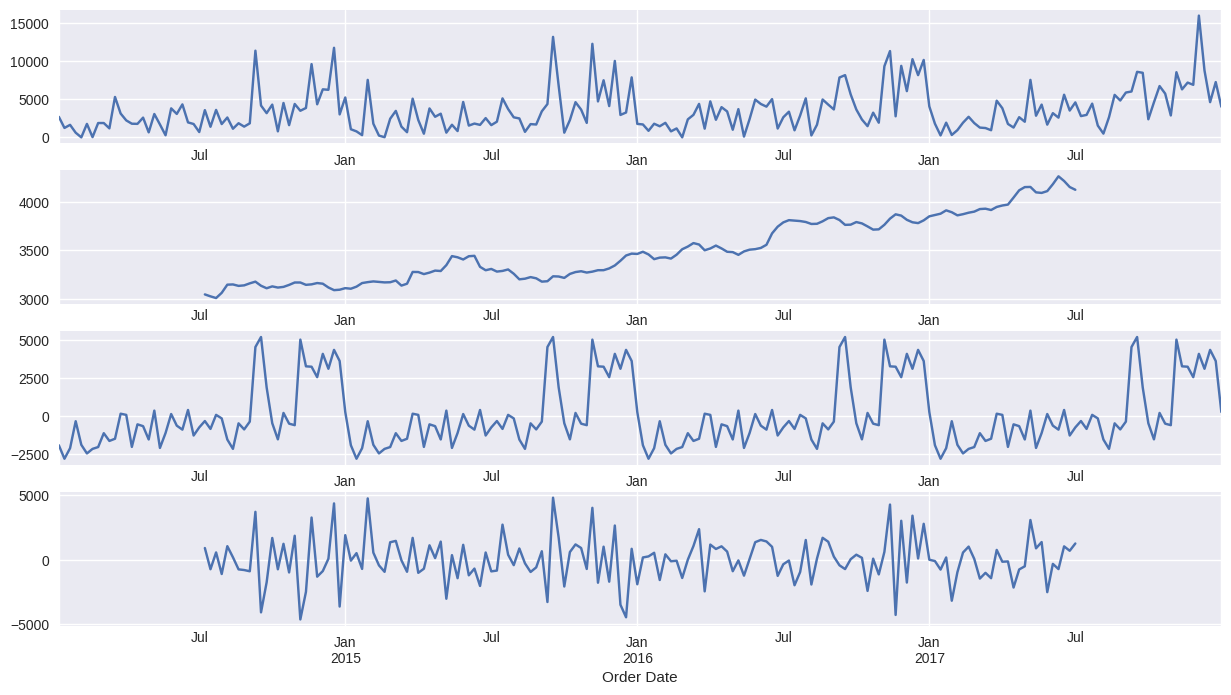

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
res = seasonal_decompose(weekly_sales['Sales'])
res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)
plt.show();

# ❓
Прокомментируй графики: какой вывод можно сделать? Есть ли в данных сезонность? Какой тренд преобладает? Какого масштаба ошибки по сравнению со значениями основного временного ряда?

> Тренд растущий. Сезонность есть, четкая даже. А вот ошибки серьезные, иногда достигают общей медианы.

5. Построй графики автокорреляционной функции и частичной автокорреляционной функции. 

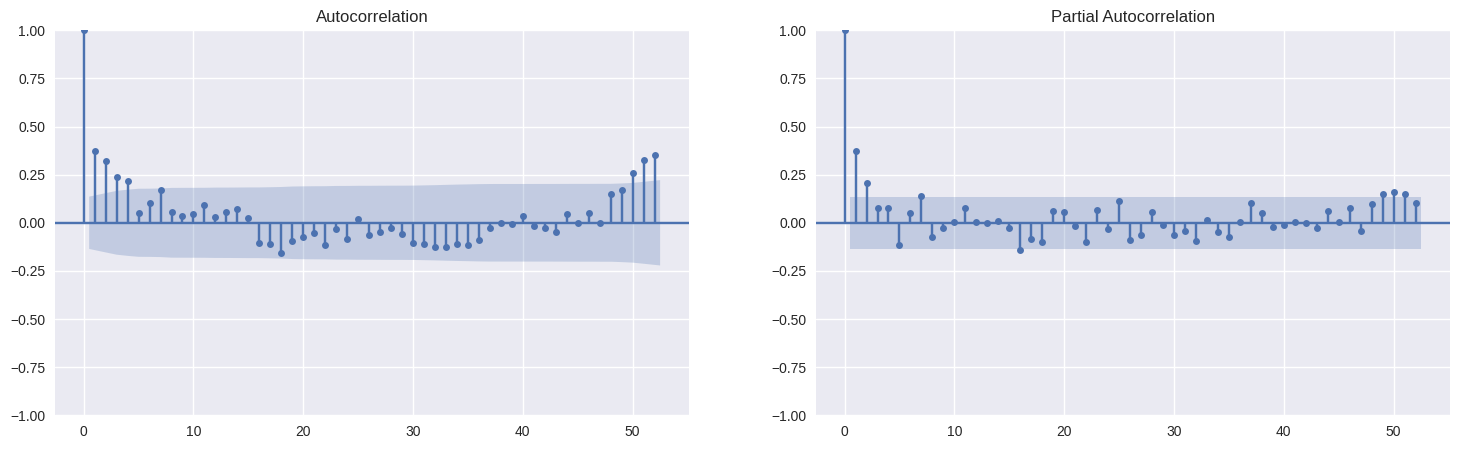

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
n_lags = 52
acf = plot_acf(weekly_sales['Sales'], ax=ax1, lags=n_lags)
pacf = plot_pacf(weekly_sales['Sales'], ax=ax2, lags=n_lags)

# ❓
Какие выводы можно сделать на основе этих графиков?

> На ACF можно увидеть годовую сезонность. На PACF видна хорошая значимость последних двух недель. В конце как будто сезоность имеется

6. Постройте и визуализируйте модель класса ARIMA

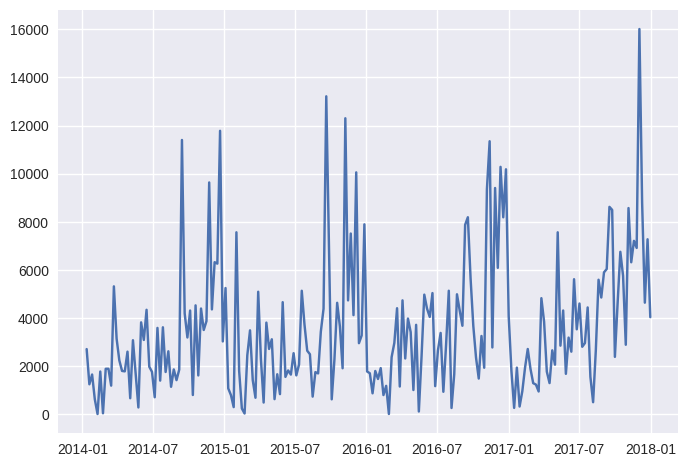

In [23]:
from statsmodels.tsa.ar_model import AutoReg

plt.plot(weekly_sales['Sales']);

In [37]:
size = int(len(weekly_sales) * 0.7)

train_data = weekly_sales.iloc[:size]
test_data = weekly_sales.iloc[size:]

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Функция для оценки модели SARIMA
def objective(trial):
    p = trial.suggest_int('p', 0, 3)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 3)
    P = trial.suggest_int('P', 0, 3)
    D = trial.suggest_int('D', 0, 2)
    Q = trial.suggest_int('Q', 0, 3)
    s = 52  # Сезонность

    try:
        model = SARIMAX(train_data,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        result = model.fit(disp=False)
        forecast = result.forecast(steps=len(test_data))
        mse = mean_squared_error(test_data, forecast)
        return mse
    except Exception as e:
        print(f"Ошибка при параметрах {p, d, q, P, D, Q}: {e}")
        return float('inf')

# Запуск оптимизации
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=600)

print(f'Лучшие параметры: {study.best_params}')
print("Best value:", study.best_value)

[I 2024-11-07 18:05:39,651] A new study created in memory with name: no-name-e935c09c-9a1d-4641-b324-c625f2e5d782
[I 2024-11-07 18:06:55,746] Trial 0 finished with value: 254559564.16581044 and parameters: {'p': 3, 'd': 0, 'q': 3, 'P': 2, 'D': 0, 'Q': 3}. Best is trial 0 with value: 254559564.16581044.
[I 2024-11-07 18:07:09,030] Trial 1 finished with value: 7120058385.65717 and parameters: {'p': 0, 'd': 2, 'q': 0, 'P': 1, 'D': 2, 'Q': 3}. Best is trial 0 with value: 254559564.16581044.
[I 2024-11-07 18:07:16,072] Trial 2 finished with value: 332055187.4752874 and parameters: {'p': 0, 'd': 2, 'q': 0, 'P': 2, 'D': 1, 'Q': 3}. Best is trial 0 with value: 254559564.16581044.
[I 2024-11-07 18:07:28,866] Trial 3 finished with value: 5448282.367970351 and parameters: {'p': 1, 'd': 0, 'q': 2, 'P': 2, 'D': 0, 'Q': 0}. Best is trial 3 with value: 5448282.367970351.
[I 2024-11-07 18:08:48,434] Trial 4 finished with value: 15490102.554916993 and parameters: {'p': 3, 'd': 2, 'q': 3, 'P': 3, 'D': 0

Лучшие параметры: {'p': 2, 'd': 0, 'q': 1, 'P': 1, 'D': 1, 'Q': 0}
Best value: 5245895.084901336


In [42]:
p = 2
d = 0
q = 1
P = 1
D = 1
Q = 0
s = 52

model = SARIMAX(train_data,
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()


forecast_test = result.forecast(steps=len(test_data))

# 3. Прогнозируем на 52 недели вперед (на год)
forecast_steps = 52  # Количество шагов на год (52 недели)
future_forecast = result.forecast(steps=forecast_steps)

# 4. Строим индекс для будущих 52 недель
future_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W')

# Вычисляем MAE и R^2
mae = mean_absolute_error(test_data, forecast_test)
r2 = r2_score(test_data, forecast_test)

print(f'MAE: {mae}')
print(f'R^2: {r2}')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42676D+00    |proj g|=  2.64024D-02


 This problem is unconstrained.



At iterate    5    f=  2.42140D+00    |proj g|=  1.17783D-04
  ys=-5.942E-05  -gs= 7.129E-05 BFGS update SKIPPED

At iterate   10    f=  2.42115D+00    |proj g|=  8.88946D-03

At iterate   15    f=  2.42071D+00    |proj g|=  1.16659D-04

At iterate   20    f=  2.42065D+00    |proj g|=  4.62329D-03

At iterate   25    f=  2.41012D+00    |proj g|=  5.39899D-02

At iterate   30    f=  2.39457D+00    |proj g|=  5.24363D-02

At iterate   35    f=  2.38491D+00    |proj g|=  4.40396D-01

At iterate   40    f=  2.38087D+00    |proj g|=  6.05828D-02

At iterate   45    f=  2.37900D+00    |proj g|=  1.50465D-01

At iterate   50    f=  2.36371D+00    |proj g|=  2.45039D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

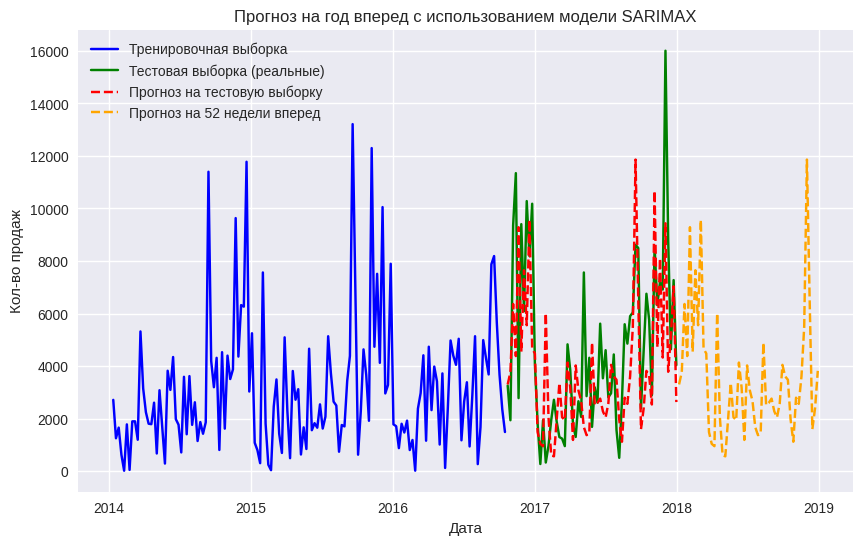

In [44]:
plt.figure(figsize=(10, 6))

# Тренировочные данные
plt.plot(train_data.index, train_data, label='Тренировочная выборка', color='blue')

# Тестовые данные (реальные)
plt.plot(test_data.index, test_data, label='Тестовая выборка (реальные)', color='green')

# Прогноз на тестовую выборку
plt.plot(test_data.index, forecast_test, label='Прогноз на тестовую выборку', color='red', linestyle='--')

# Прогноз на 52 недели вперед
plt.plot(future_index, future_forecast, label='Прогноз на 52 недели вперед', color='orange', linestyle='--')

# Подписи и легенда
plt.title('Прогноз на год вперед с использованием модели SARIMAX')
plt.xlabel('Дата')
plt.ylabel('Кол-во продаж')
plt.legend()

plt.show()

7. Постройте и визуализируйте модель prophet. Попробуйте подобрать оптимальные параметры

8. Примени регрессионные модели (случайный лес или градиентный бустинг) для прогнозирования целевой величины.
   * Пример есть в демо

In [26]:
# code

9. Создайте Streamlit-приложение, в которое пользователь сможет загрузить свой файл с временным рядом, и получить результат предсказания, а так же метрики и интерпретацию результатов

10*. Если останется время, можно попробовать дополнительно одну из библиотек: 
* [Darts](https://habr.com/ru/articles/659405/)
* [Merlion](https://habr.com/ru/companies/sportmaster_lab/articles/792318/)
* [tsfresh](https://tsfresh.readthedocs.io/en/latest/)
* [Kats](https://github.com/facebookresearch/Kats)
* [autots](https://winedarksea.github.io/AutoTS/build/html/source/tutorial.html)

In [27]:
# code

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 
